##### Deliverables:

- Submit files that have the name: <font color = 'red'>YourLastName_Exercise_4</font> that has the following files:

 1. Your **HTML file** that has your Source code and output
 2. Your **ipynb script** that has your Source code and output


# Objectives:

In this exercise, you will:

 - Construct hierarchical indexes
 - Select and group data to create pivot-tables
 - Use of lambda, map, pivot

 


# Specifications and Requirements


We're going to use the XYZ data again  to construct hierarchical indexes and select, modify, group, and reshape data in a wide variety of ways.  

In [1]:
import pandas as pd 
import numpy as np   
from pandas import Categorical 
from sqlalchemy import create_engine

# set up notebook to display multiple output in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
engine = create_engine('sqlite:///xyz.db')

In [3]:
# .info gives same feedback as .dtype and .count
xyznew = pd.read_sql_table('xyzcust',engine)
xyznew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30179 entries, 0 to 30178
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  30179 non-null  int64  
 1   ACCTNO                 30179 non-null  object 
 2   ZIP                    30179 non-null  int64  
 3   ZIP4                   30179 non-null  int64  
 4   LTD_SALES              30179 non-null  float64
 5   LTD_TRANSACTIONS       30179 non-null  int64  
 6   YTD_SALES_2009         30179 non-null  float64
 7   YTD_TRANSACTIONS_2009  30179 non-null  int64  
 8   CHANNEL_ACQUISITION    30179 non-null  object 
 9   BUYER_STATUS           30179 non-null  object 
 10  ZIP9_SUPERCODE         30179 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 2.5+ MB


### What can we learn from sales?

In [4]:
# look at characteristics 
xyznew['YTD_SALES_2009'].describe()

count     30179.000000
mean        236.283972
std        2117.042293
min           0.000000
25%           0.000000
50%           0.000000
75%         207.000000
max      351000.000000
Name: YTD_SALES_2009, dtype: float64

In [5]:
# We know there is more than one buyer status
# Are Inactive and Lapsed buyers skewing the statistics
temp = xyznew['YTD_SALES_2009'].groupby(xyznew['BUYER_STATUS']).sum()
temp

BUYER_STATUS
ACTIVE      7130814.0
INACTIVE          0.0
LAPSED            0.0
Name: YTD_SALES_2009, dtype: float64

In [6]:
# isolate only active customers
temp = xyznew[xyznew['BUYER_STATUS'] == 'ACTIVE'] 
temp['YTD_SALES_2009'].describe()

count     13332.000000
mean        534.864536
std        3160.079031
min           3.000000
25%         114.000000
50%         246.000000
75%         558.000000
max      351000.000000
Name: YTD_SALES_2009, dtype: float64

In [7]:
# the max number appears to be an outlier, but it is a confirmed sale
# lets look at stats without it anyways
temp = temp[temp['YTD_SALES_2009'] < 350000]
temp['YTD_SALES_2009'].describe()

count    13331.000000
mean       508.575051
std        878.588664
min          3.000000
25%        114.000000
50%        246.000000
75%        558.000000
max      28002.000000
Name: YTD_SALES_2009, dtype: float64

In [8]:
# heavyCut will be used to slice/dice our customers into strong buyers
# mean is $509
# median is $246
# sd is $879
# let's try a cut number using the median
heavyCut= 246

In [9]:
# creating a derived variable from existing data
# create a categorial variable of either a 1 or 0 based upon the value of heavyCut
# YTD_SALES_2009 greater than the heavyCut value will be assigned a 1
heavyCat = Categorical(np.where(xyznew.YTD_SALES_2009 > heavyCut,1,0))
heavyCat.describe()

,counts,freqs
categories,,
0,23543,0.780112
1,6636,0.219888


In [10]:
# be more descriptive than a 1 or a 0
heavyCat.rename_categories(['regular','heavy'],inplace=True)
heavyCat.describe()

C:\Users\TK\AppData\Local\Temp\ipykernel_32764\3950609777.py:2: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  heavyCat.rename_categories(['regular','heavy'],inplace=True)


,counts,freqs
categories,,
regular,23543,0.780112
heavy,6636,0.219888


In [11]:
# look at the first ten records
heavyCat[:10]
type(heavyCat)

['regular', 'heavy', 'regular', 'regular', 'regular', 'regular', 'heavy', 'regular', 'regular', 'regular']
Categories (2, object): ['regular', 'heavy']

pandas.core.arrays.categorical.Categorical

In [12]:
# create a new column with this variable
xyznew['heavyCat'] = heavyCat
xyznew.head(10)

,index,ACCTNO,ZIP,ZIP4,LTD_SALES,LTD_TRANSACTIONS,YTD_SALES_2009,YTD_TRANSACTIONS_2009,CHANNEL_ACQUISITION,BUYER_STATUS,ZIP9_SUPERCODE,heavyCat
0,0,WDQQLLDQL,60084,5016,90.0,1,0.0,0,IB,INACTIVE,600845016,regular
1,1,WQWAYHYLA,60091,1750,4227.0,9,1263.0,3,RT,ACTIVE,600911750,heavy
2,2,GSHAPLHAW,60067,900,420.0,3,129.0,1,RT,ACTIVE,600670900,regular
3,3,PGGYDYWAD,60068,3838,6552.0,6,0.0,0,RT,INACTIVE,600683838,regular
4,4,LWPSGPLLS,60090,3932,189.0,3,72.0,1,RT,ACTIVE,600903932,regular
5,5,LQGYDGSYQ,60085,8670,4278.0,12,102.0,1,RT,ACTIVE,600858670,regular
6,6,WGQWQDPDA,60091,3447,1869.0,5,495.0,1,RT,ACTIVE,600913447,heavy
7,7,LPASPGYLS,60091,1613,33.0,1,33.0,1,RT,ACTIVE,600911613,regular
8,8,GPGDSHGL,60068,3668,735.0,2,0.0,0,RT,INACTIVE,600683668,regular
9,9,PQHSWQSDQ,60091,0,468.0,2,0.0,0,RT,INACTIVE,600911759,regular


In [13]:
# to see heavyCat with channel acquisition
pd.crosstab(xyznew['heavyCat'], xyznew['CHANNEL_ACQUISITION'])

CHANNEL_ACQUISITION,CB,IB,RT
heavyCat,,,
regular,1353,3149,19041
heavy,509,1026,5101


In [14]:
# a dummy variable marks the field as either 1 or 0
buyerType = pd.get_dummies(heavyCat)
buyerType[:3]
type(buyerType)

,regular,heavy
0,1,0
1,0,1
2,1,0


pandas.core.frame.DataFrame

In [15]:
# create new columns
xyznew['typeReg']=buyerType['regular']
xyznew['typeHeavy']=buyerType['heavy']

xyznew.columns

# look at new variables
xyznew.sample(5).transpose

Index(['index', 'ACCTNO', 'ZIP', 'ZIP4', 'LTD_SALES', 'LTD_TRANSACTIONS',
       'YTD_SALES_2009', 'YTD_TRANSACTIONS_2009', 'CHANNEL_ACQUISITION',
       'BUYER_STATUS', 'ZIP9_SUPERCODE', 'heavyCat', 'typeReg', 'typeHeavy'],
      dtype='object')

<bound method DataFrame.transpose of        index     ACCTNO    ZIP  ZIP4  LTD_SALES  LTD_TRANSACTIONS  \
18707  18893  WPYSGDASP  60061  1057      117.0                 1   
25864  26118  WAPPSHHHS  60093  3619     2370.0                 8   
5894    5945  APYHDPAQY  60091  9999       66.0                 1   
12222  12348  LSDADDPLS  60067  8677     2472.0                10   
29633  29925  WPLLSSLWD  60074  7206      789.0                 4   

       YTD_SALES_2009  YTD_TRANSACTIONS_2009 CHANNEL_ACQUISITION BUYER_STATUS  \
18707             0.0                      0                  RT     INACTIVE   
25864           615.0                      2                  RT       ACTIVE   
5894              0.0                      0                  RT     INACTIVE   
12222          1578.0                      5                  RT       ACTIVE   
29633           327.0                      1                  RT       ACTIVE   

       ZIP9_SUPERCODE heavyCat  typeReg  typeHeavy  
18707   

In [16]:
# read in xyztrans data

xyztrans = pd.read_sql('xyztrans', engine)
xyztrans.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62395 entries, 0 to 62394
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         62395 non-null  int64  
 1   ACCTNO        62395 non-null  object 
 2   QTY           62395 non-null  int64  
 3   TRANDATE      62395 non-null  object 
 4   TRAN_CHANNEL  62395 non-null  object 
 5   PRICE         62395 non-null  float64
 6   TOTAMT        62395 non-null  float64
 7   ORDERNO       62395 non-null  object 
 8   DEPTDESCR     62395 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 4.3+ MB


In [17]:
# what is in dept description?
xyztrans['DEPTDESCR'].value_counts()


Mobile Electronic Accessories    18007
Small Appliances                 15641
Mobile Electronics               13063
Home Audio                        7257
Portable Electronics              5691
Cameras & Camcorder Accessori     2732
Appliances                           4
Name: DEPTDESCR, dtype: int64

In [18]:
# for this exercises we need to create trCountsChrono object  
# working with date fields

trandate = xyztrans['TRANDATE'] # should be a Series
type(trandate)

daystr = trandate.str[0:2] # two digit date numbers slice

mostr = trandate.str[2:5] # the three letter month abbreviations

yearstr = trandate.str[5:] # four digit years

# show deconstructed date and original date
print(daystr[0],mostr[0],yearstr[0],xyztrans.TRANDATE[0])

pandas.core.series.Series

09 JUN 2009 09JUN2009


In [19]:
#create a dictionary for the months
monums = {'JAN':'1', 'FEB':'2', 'MAR':'3', 'APR':'4', 'MAY':'5', 'JUN':'6', 
        'JUL':'7', 'AUG':'8', 'SEP':'9', 'OCT':'10', 'NOV':'11','DEC':'12'}
#month
monos = mostr.map(monums)	# do a dict lookup for each value of mostr

transtr = yearstr + '-' + monos + '-' + daystr

# show reconstruction with month numbers
print(transtr[0])

2009-6-09


In [20]:
# convert to datetime values
trDateTime = pd.to_datetime(transtr)

# look at counts by date
trCounts = trDateTime.value_counts()
trCounts

2009-12-19    877
2009-12-21    836
2009-12-12    782
2009-12-23    765
2009-12-20    744
             ... 
2009-12-25     11
2009-04-12     10
2009-10-13     10
2009-08-21      6
2009-03-15      5
Name: TRANDATE, Length: 365, dtype: int64

In [21]:
# create a new index
newIndex = pd.date_range(trCounts.index.min(),trCounts.index.max())

# use the new index to change order
trCountsChrono = trCounts.reindex(index=newIndex)
print(trCountsChrono.head())

2009-01-01    176
2009-01-02    305
2009-01-03    365
2009-01-04    231
2009-01-05    144
Freq: D, Name: TRANDATE, dtype: int64


In [22]:
# when coming across new code, if you are unsure of what it is doing
# deconstruct the code by printing out parts of the code
newIndex

DatetimeIndex(['2009-01-01', '2009-01-02', '2009-01-03', '2009-01-04',
               '2009-01-05', '2009-01-06', '2009-01-07', '2009-01-08',
               '2009-01-09', '2009-01-10',
               ...
               '2009-12-22', '2009-12-23', '2009-12-24', '2009-12-25',
               '2009-12-26', '2009-12-27', '2009-12-28', '2009-12-29',
               '2009-12-30', '2009-12-31'],
              dtype='datetime64[ns]', length=365, freq='D')

In [23]:
# initialize a dataframe
trDF = pd.DataFrame()

In [24]:
# load dataframe with 2 columns
trDF['date'] = trCountsChrono.index
trDF['transactions'] = trCountsChrono.values

# what was created
trDF.columns
trDF.info()
trDF.head()

Index(['date', 'transactions'], dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          365 non-null    datetime64[ns]
 1   transactions  365 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.8 KB


,date,transactions
0,2009-01-01,176
1,2009-01-02,305
2,2009-01-03,365
3,2009-01-04,231
4,2009-01-05,144


In [25]:
# create a constant based on the median
trMed = trDF['transactions'].median() 
trMed

136.0

In [26]:
# ------------- lambda -----------------------------------
# 4.7.6 in the following documentation
# https://docs.python.org/3/tutorial/controlflow.html
# --------------------------------------------------------
# if the value is greater than or equal to the median, then heavy
heavyLight = lambda x  : x >= trMed and 'heavy' or 'light'   

https://docs.python.org/3/library/functions.html#map
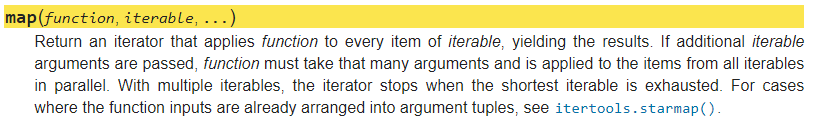

In [27]:
# use map to call lambda
trDF['vol'] = trDF['transactions'].map(heavyLight) # 'vol' is the heavy/light column
trDF.head(10)

,date,transactions,vol
0,2009-01-01,176,heavy
1,2009-01-02,305,heavy
2,2009-01-03,365,heavy
3,2009-01-04,231,heavy
4,2009-01-05,144,heavy
5,2009-01-06,188,heavy
6,2009-01-07,166,heavy
7,2009-01-08,52,light
8,2009-01-09,194,heavy
9,2009-01-10,166,heavy


In [28]:
# extract the month from our date
trDF['monum'] = trDF.date.dt.month 

In [29]:
# making a copy of trDF while also dropping date as a column
# axis=1 means here a column is selected to drop
trDFnd = trDF.drop('date',axis=1)
trDFnd.head()

,transactions,vol,monum
0,176,heavy,1
1,305,heavy,1
2,365,heavy,1
3,231,heavy,1
4,144,heavy,1


In [30]:
# remember that drop gave us a whole new copy of the dataframe
id(trDF)
id(trDFnd)

2984030419024

2984075441536

In [31]:
trDFgrouped = trDFnd.groupby(['monum','vol']).sum()
trDFgrouped.head()
trDFgrouped.info() #notice the multi index on the dataframe

transactions
monum vol                
1     heavy          5255
      light           572
2     heavy           761
      light          1625
3     heavy          1130

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 24 entries, (1, 'heavy') to (12, 'light')
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   transactions  24 non-null     int64
dtypes: int64(1)
memory usage: 458.0+ bytes


In [32]:
# check out the indexes
trDFgrouped.index.levels

FrozenList([[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ['heavy', 'light']])

In [33]:
# with indexes you can reference specific data easily
trDFgrouped.loc[11,'heavy']

transactions    8402
Name: (11, heavy), dtype: int64

In [34]:
# first six months of data
trDFgrouped.loc[list(range(1,7))]

transactions
monum vol                
1     heavy          5255
      light           572
2     heavy           761
      light          1625
3     heavy          1130
      light          1664
4     heavy          2327
      light          1727
5     heavy          2172
      light          2076
6     heavy          2878
      light          1495

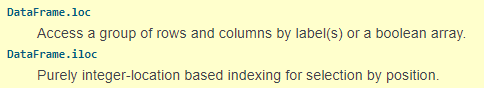

In [35]:
# or the first 6 rows of data:
trDFgrouped.iloc[0:6] # .iloc here, but .loc above.

transactions
monum vol                
1     heavy          5255
      light           572
2     heavy           761
      light          1625
3     heavy          1130
      light          1664

In [36]:
trDFgrouped[(3,'light'):(7,'heavy')]

transactions
monum vol                
3     light          1664
4     heavy          2327
      light          1727
5     heavy          2172
      light          2076
6     heavy          2878
      light          1495
7     heavy          4440

In [37]:
trDFgrouped[(3,'light'):6]

transactions
monum vol                
3     light          1664
4     heavy          2327
      light          1727
5     heavy          2172
      light          2076
6     heavy          2878
      light          1495

In [38]:
# pandas xs returns a cross section from Series/DataFrame
trDFgrouped.xs('light',level='vol')

,transactions
monum,
1,572
2,1625
3,1664
4,1727
5,2076
6,1495
7,564
8,1938
9,1942


In [39]:
trDFgrouped.xs('light',level='vol').T # the transpose of the above

monum,1,2,3,4,5,6,7,8,9,10,11,12
transactions,572,1625,1664,1727,2076,1495,564,1938,1942,2241,49,257


In [40]:
# remember we read in xyznew from xyz.db
# lets slice out three columns
xyzdata = xyznew[['BUYER_STATUS','heavyCat','CHANNEL_ACQUISITION']]

In [41]:
xyzgrouped = xyzdata.groupby(['BUYER_STATUS','heavyCat','CHANNEL_ACQUISITION'])


In [42]:
xyzCountData = xyzgrouped.size() # a MultiIndexed Series of counts
xyzCountData

BUYER_STATUS  heavyCat  CHANNEL_ACQUISITION
ACTIVE        regular   CB                      290
                        IB                      789
                        RT                     5617
              heavy     CB                      509
                        IB                     1026
                        RT                     5101
INACTIVE      regular   CB                      691
                        IB                     1249
                        RT                     7056
              heavy     CB                        0
                        IB                        0
                        RT                        0
LAPSED        regular   CB                      372
                        IB                     1111
                        RT                     6368
              heavy     CB                        0
                        IB                        0
                        RT                        0
dtype: int64

In [43]:
print(xyzCountData.unstack())

CHANNEL_ACQUISITION     CB    IB    RT
BUYER_STATUS heavyCat                 
ACTIVE       regular   290   789  5617
             heavy     509  1026  5101
INACTIVE     regular   691  1249  7056
             heavy       0     0     0
LAPSED       regular   372  1111  6368
             heavy       0     0     0


In [44]:
xyzcust = xyznew[['BUYER_STATUS','heavyCat','LTD_SALES']].copy()

In [45]:
xyzcustm = pd.melt(xyzcust,id_vars=['BUYER_STATUS','heavyCat'],var_name="LTD_SALES")

type(xyzcustm)
print(xyzcustm)

pandas.core.frame.DataFrame

      BUYER_STATUS heavyCat  LTD_SALES   value
0         INACTIVE  regular  LTD_SALES    90.0
1           ACTIVE    heavy  LTD_SALES  4227.0
2           ACTIVE  regular  LTD_SALES   420.0
3         INACTIVE  regular  LTD_SALES  6552.0
4           ACTIVE  regular  LTD_SALES   189.0
...            ...      ...        ...     ...
30174       ACTIVE  regular  LTD_SALES  2736.0
30175       ACTIVE  regular  LTD_SALES  2412.0
30176     INACTIVE  regular  LTD_SALES   429.0
30177     INACTIVE  regular  LTD_SALES   651.0
30178       ACTIVE    heavy  LTD_SALES  4527.0

[30179 rows x 4 columns]


You'll probably realize that the leftmost column is a simple numerical index that this pandas method created.  There's a pandas method called wide_to_long that works similarly, but can be a little easier to use. Give it a try using xyzcust or the DataFrame of your choice.

So at this point we've pivoted, grouped, and reshaped.  The pivoting example we did was pretty simple.  pandas also provides a method called pivot_table that provides considerable flexibility in terms of how data can be reorganized and summarized.  Let's consider the xyznew data once again.  Suppose we want to average YTD_SALES_2009 by BUYER_STATUS, CHANNEL_ACQUISITION, and heavyCAT.  WE could do:


In [46]:
pd.pivot_table(xyznew,values='YTD_SALES_2009',index=['BUYER_STATUS','heavyCat'],columns=['CHANNEL_ACQUISITION'])


CHANNEL_ACQUISITION             CB          IB          RT
BUYER_STATUS heavyCat                                     
ACTIVE       regular    138.527586  135.657795  117.957629
             heavy     1776.695481  960.289474  868.740247
INACTIVE     regular      0.000000    0.000000    0.000000
LAPSED       regular      0.000000    0.000000    0.000000

Do you see some rows in the result that only have zeros?  Why are they there?

Or, try doing:


In [47]:
pd.pivot_table(xyznew,values='YTD_SALES_2009',index=['BUYER_STATUS'],columns=['heavyCat','CHANNEL_ACQUISITION'])


heavyCat                regular                                heavy  \
CHANNEL_ACQUISITION          CB          IB          RT           CB   
BUYER_STATUS                                                           
ACTIVE               138.527586  135.657795  117.957629  1776.695481   
INACTIVE               0.000000    0.000000    0.000000          NaN   
LAPSED                 0.000000    0.000000    0.000000          NaN   

heavyCat                                     
CHANNEL_ACQUISITION          IB          RT  
BUYER_STATUS                                 
ACTIVE               960.289474  868.740247  
INACTIVE                    NaN         NaN  
LAPSED                      NaN         NaN

Why are there NaN's?

pivot_table defaults to taking the mean (using np.mean) of the groups it defines.  If you want some other aggregation instead, you can define it as a keyword parameter, e.g. aggfunc=np.sum:


In [48]:
pd.pivot_table(xyznew,values='YTD_SALES_2009',
               index=['BUYER_STATUS'],columns=['heavyCat','CHANNEL_ACQUISITION'],aggfunc=np.sum)


heavyCat             regular                         heavy            \
CHANNEL_ACQUISITION       CB        IB        RT        CB        IB   
BUYER_STATUS                                                           
ACTIVE               40173.0  107034.0  662568.0  904338.0  985257.0   
INACTIVE                 0.0       0.0       0.0       0.0       0.0   
LAPSED                   0.0       0.0       0.0       0.0       0.0   

heavyCat                        
CHANNEL_ACQUISITION         RT  
BUYER_STATUS                    
ACTIVE               4431444.0  
INACTIVE                   0.0  
LAPSED                     0.0

You can also add margins to pivot_tables by using the margins=True option.  For example, to get row and column totals:

In [49]:
pd.pivot_table(xyznew,values='YTD_SALES_2009',
               index=['BUYER_STATUS'],columns=['heavyCat','CHANNEL_ACQUISITION'],aggfunc=np.sum,margins=True)


heavyCat             regular                         heavy            \
CHANNEL_ACQUISITION       CB        IB        RT        CB        IB   
BUYER_STATUS                                                           
ACTIVE               40173.0  107034.0  662568.0  904338.0  985257.0   
INACTIVE                 0.0       0.0       0.0       0.0       0.0   
LAPSED                   0.0       0.0       0.0       0.0       0.0   
All                  40173.0  107034.0  662568.0  904338.0  985257.0   

heavyCat                              All  
CHANNEL_ACQUISITION         RT             
BUYER_STATUS                               
ACTIVE               4431444.0  7130814.0  
INACTIVE                   0.0        0.0  
LAPSED                     0.0        0.0  
All                  4431444.0  7130814.0

Should give you the same table as above but with row and column totals added.

It has probably dawned on you that you can manipulate data objects in many different ways to group them and to apply descriptive statistics to them.   Let's group xyz customers using BUYER_STATUS and heavyCat:


In [50]:
xyzGrouper=xyznew.groupby(['BUYER_STATUS','heavyCat'])

groupby can apply conventional as well as custom functions to aggregated data.  For example:

In [51]:
xyzGrouper.agg({'YTD_SALES_2009': [np.mean, np.std],'LTD_SALES':[np.mean,np.std]})


YTD_SALES_2009                 LTD_SALES              
                                mean          std         mean           std
BUYER_STATUS heavyCat                                                       
ACTIVE       regular      120.934140    62.877303   842.158154   1301.147675
             heavy        952.537523  4439.890533  3207.213834  27852.422903
INACTIVE     regular        0.000000     0.000000   568.014784    850.966479
             heavy               NaN          NaN          NaN           NaN
LAPSED       regular        0.000000     0.000000   841.467329   1374.447756
             heavy               NaN          NaN          NaN           NaN

calculates the mean and standard deviation of YTD_SALES_2009 and LTD_SALES for each of the groups defined in xyzGrouper.  Note the little dict with a couple of key/value pairs there in the curly brackets, the {}.

Try using a version of this command to get statistics for the columns YTD_TRANSACTIONS_2009 and LTD_TRANSACTIONS.  These are both count variables.  What descriptive statistics do you think are appropriate for summarizing them?

Note that you can apply custom functions to data aggregates.  Suppose we wanted to compute the coefficient of variation,,”CV,” for data.  The CV is a standardized measure of dispersion, and is the ratio of the standard deviation to to the mean.  It's estimated by the ratio  of the estimates of these two statistics.  We could write our own function do do this:


In [52]:
def coefV(x):                       # a baby CV function that accepts a sequence
    return np.std(x)/np.mean(x)


This will work assuming that the mean and std numpy methods are available in this function's namespace, of course.  Note that our baby function doesn't do anything smart regarding missing values and other inconveniences, but it's good enough to demonstrate what we want, here.  What do you think it means if what it produces is negative?  How could that happen?

We can apply this function to selected groups.  Here we apply it to customers grouped by BUYER_STATUS.  Let's first get a simpler DataFrame to fiddle with:


In [53]:
buyerStats=xyznew[['BUYER_STATUS','LTD_SALES','LTD_TRANSACTIONS']]
buyerGrouper=buyerStats.groupby(['BUYER_STATUS'])
buyerGrouper.agg(coefV)

,LTD_SALES,LTD_TRANSACTIONS
BUYER_STATUS,,
ACTIVE,9.758480,1.153501
INACTIVE,1.498058,0.784441
LAPSED,1.633290,0.987139


In [54]:
def ptiles(x):
    p5=np.percentile(x,5)
    p95=np.percentile(x,95)
    return p5, p95


In [55]:
buyerGrouper.agg([np.mean, ptiles])

LTD_SALES                            LTD_TRANSACTIONS  \
                     mean                     ptiles             mean   
BUYER_STATUS                                                            
ACTIVE        2019.364086  (81.0, 6544.349999999997)         6.935794   
INACTIVE       568.014784             (60.0, 1776.0)         2.263895   
LAPSED         841.467329             (63.0, 2904.0)         3.498280   

                           
                   ptiles  
BUYER_STATUS               
ACTIVE        (1.0, 20.0)  
INACTIVE       (1.0, 6.0)  
LAPSED         (1.0, 9.0)

In [56]:
buyerGrouper.agg([np.mean,ptiles]).loc['ACTIVE','LTD_SALES']

mean                    2019.364086
ptiles    (81.0, 6544.349999999997)
Name: ACTIVE, dtype: object

<div class="alert alert-block alert-warning">

# Requirements :

Answer your homework questions below; add as many cells as needed.
</div>

## Requirement 1 (7 points)

a) Of the Active customers only, show a crosstab of heavyCat and channel acquisition.  <br>
b) Of the non-Active customers, show a crosstab of heavyCat and channel acquisition.

In [57]:
#part a
active_cust = xyznew[xyznew['BUYER_STATUS'] == 'ACTIVE']
crosstaba = pd.crosstab(active_cust['heavyCat'],active_cust['CHANNEL_ACQUISITION'])
crosstaba

CHANNEL_ACQUISITION,CB,IB,RT
heavyCat,,,
regular,290,789,5617
heavy,509,1026,5101


In [58]:
#part b
inactive_cust = xyznew[xyznew['BUYER_STATUS'] == 'INACTIVE']
crosstabb = pd.crosstab(inactive_cust['heavyCat'],inactive_cust['CHANNEL_ACQUISITION'])
crosstabb

CHANNEL_ACQUISITION,CB,IB,RT
heavyCat,,,
regular,691,1249,7056


In [59]:
active_cust.head()

,index,ACCTNO,ZIP,ZIP4,LTD_SALES,LTD_TRANSACTIONS,YTD_SALES_2009,YTD_TRANSACTIONS_2009,CHANNEL_ACQUISITION,BUYER_STATUS,ZIP9_SUPERCODE,heavyCat,typeReg,typeHeavy
1,1,WQWAYHYLA,60091,1750,4227.0,9,1263.0,3,RT,ACTIVE,600911750,heavy,0,1
2,2,GSHAPLHAW,60067,900,420.0,3,129.0,1,RT,ACTIVE,600670900,regular,1,0
4,4,LWPSGPLLS,60090,3932,189.0,3,72.0,1,RT,ACTIVE,600903932,regular,1,0
5,5,LQGYDGSYQ,60085,8670,4278.0,12,102.0,1,RT,ACTIVE,600858670,regular,1,0
6,6,WGQWQDPDA,60091,3447,1869.0,5,495.0,1,RT,ACTIVE,600913447,heavy,0,1


## Requirement 2 (7 points)

a) Create a dataframe with LTD Sales, 2009 Sales, Channel Acquistion and heavyCat for all customers. <br>
b) Using Groupby, show mean LTD Sales and 2009 Sales by Channel Acquistion and heavyCat.

In [60]:
#part a
req2_df = active_cust[['LTD_SALES','YTD_SALES_2009','CHANNEL_ACQUISITION','heavyCat']]
req2_df.head()

,LTD_SALES,YTD_SALES_2009,CHANNEL_ACQUISITION,heavyCat
1,4227.0,1263.0,RT,heavy
2,420.0,129.0,RT,regular
4,189.0,72.0,RT,regular
5,4278.0,102.0,RT,regular
6,1869.0,495.0,RT,heavy


In [61]:
#part b
req2_df.groupby(['CHANNEL_ACQUISITION','heavyCat']).mean()[['LTD_SALES','YTD_SALES_2009']]

LTD_SALES  YTD_SALES_2009
CHANNEL_ACQUISITION heavyCat                             
CB                  regular   1502.027586      138.527586
                    heavy     8913.907662     1776.695481
IB                  regular    897.414449      135.657795
                    heavy     3009.538012      960.289474
RT                  regular    800.328111      117.957629
                    heavy     2677.534993      868.740247

## Requirement 3 (7 points)

Consider the multi-indexed file trDFgrouped. <br>
a) Show the values of May for both heavy and light without using .loc or .iloc <br>
b) use .loc to show the values of June heavy/light through July heavy/light <br>
c) use .iloc to show the values of June heavy/light through July heavy/light <br>

In [62]:
trDFgrouped.head()

transactions
monum vol                
1     heavy          5255
      light           572
2     heavy           761
      light          1625
3     heavy          1130

In [63]:
#part a
trDFgrouped[trDFgrouped.index.get_level_values(0) == 5]

transactions
monum vol                
5     heavy          2172
      light          2076

In [64]:
#part b
trDFgrouped.loc[6:7]

transactions
monum vol                
6     heavy          2878
      light          1495
7     heavy          4440
      light           564

In [65]:
#part c
trDFgrouped.iloc[10:14]

transactions
monum vol                
6     heavy          2878
      light          1495
7     heavy          4440
      light           564

## Requirement 4 (14 points)

a) Create a dataframe with xyztrans data of department description, total amount and trans date month (not the full trandate field). It is okay to leave the month as the three letter abbreviation or you can convert to a number.   <br>
b) Create a pivot from the dataframe to show total amount totals (not means, but totals) by Month and by department description   <br>
c) The pivot shows NaN's.  Explain why the NaN's show up in the pivot, but did not show in the your starting dataframe.  Show how you came up with your answer.  

In [66]:
xyztrans.head()

,index,ACCTNO,QTY,TRANDATE,TRAN_CHANNEL,PRICE,TOTAMT,ORDERNO,DEPTDESCR
0,0,WGDQLA,1,09JUN2009,RT,599.85,599.85,CCXXNNXXXXUX,Home Audio
1,1,WGDQLA,1,09JUN2009,RT,39.00,39.00,CCXXNNXXXXUX,Small Appliances
2,2,WGDQLA,1,28NOV2009,RT,15.00,15.00,CCXNXXKXXXRI,Small Appliances
3,3,WGDQLA,1,28NOV2009,RT,69.00,69.00,CCXNXXKXXXRI,Small Appliances
4,4,WGDQLA,1,28NOV2009,RT,84.00,84.00,CCXNXXKXXXRI,Small Appliances


In [67]:
#part a
req4_df = xyztrans[['DEPTDESCR','TOTAMT','TRANDATE']]
req4_df['TRANDATE'] = pd.to_datetime(req4_df['TRANDATE'], format='%d%b%Y')
req4_df['month'] = pd.DatetimeIndex(req4_df['TRANDATE']).month_name()
req4_df.head()

C:\Users\TK\AppData\Local\Temp\ipykernel_32764\1169373652.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  req4_df['TRANDATE'] = pd.to_datetime(req4_df['TRANDATE'], format='%d%b%Y')
C:\Users\TK\AppData\Local\Temp\ipykernel_32764\1169373652.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  req4_df['month'] = pd.DatetimeIndex(req4_df['TRANDATE']).month_name()


,DEPTDESCR,TOTAMT,TRANDATE,month
0,Home Audio,599.85,2009-06-09,June
1,Small Appliances,39.00,2009-06-09,June
2,Small Appliances,15.00,2009-11-28,November
3,Small Appliances,69.00,2009-11-28,November
4,Small Appliances,84.00,2009-11-28,November


In [68]:
#part b
partb = pd.pivot_table(req4_df,values='TOTAMT',index=['month'],columns=['DEPTDESCR'])
partb.round(2)

DEPTDESCR,Appliances,Cameras & Camcorder Accessori,Home Audio,Mobile Electronic Accessories,Mobile Electronics,Portable Electronics,Small Appliances
month,,,,,,,
April,1170.00,406.22,335.56,42.55,64.49,155.64,67.66
August,NaN,128.36,409.67,43.12,64.38,174.96,73.62
December,NaN,163.91,329.91,52.59,65.25,150.54,69.45
February,569.85,414.34,409.51,42.88,70.65,192.03,68.60
January,NaN,143.97,319.17,34.94,46.17,111.98,59.78
July,1050.00,238.09,360.42,36.73,54.50,128.50,60.93
June,NaN,147.19,417.27,39.55,72.98,157.78,73.27
March,NaN,148.94,312.94,48.08,70.72,189.24,70.37
May,NaN,171.24,396.87,41.24,71.16,169.78,71.89


In [69]:
req4_df[req4_df['DEPTDESCR'] == 'Appliances']

,DEPTDESCR,TOTAMT,TRANDATE,month
1211,Appliances,569.85,2009-02-20,February
29711,Appliances,1170.00,2009-04-11,April
48145,Appliances,1125.00,2009-07-11,July
48146,Appliances,975.00,2009-07-11,July


NaN's show up in the pivot because the pivot fully creates columns for each month (1-12). NaN's are not seen in the initial DF because not every month exsts for appliances. So As shown in the filtered df, we only see 2,4,7 for months for appliances. Months 1,3,5,6,8,9,10,11,12 aren't input as null records, they just don't exist at all. 

## Requirement 5 (5 points)

Take the pivot from Requirement 4 and represent the NaN's as zeroes.

In [70]:
req5 = partb.fillna(0)
req5

DEPTDESCR,Appliances,Cameras & Camcorder Accessori,Home Audio,Mobile Electronic Accessories,Mobile Electronics,Portable Electronics,Small Appliances
month,,,,,,,
April,1170.00,406.217755,335.556255,42.545802,64.493718,155.638203,67.664501
August,0.00,128.361290,409.674698,43.115035,64.381721,174.957704,73.615651
December,0.00,163.910785,329.909486,52.585866,65.250556,150.542075,69.447090
February,569.85,414.342321,409.506475,42.883590,70.649881,192.027787,68.603333
January,0.00,143.972759,319.172000,34.938518,46.173637,111.980080,59.777776
July,1050.00,238.087385,360.422640,36.730588,54.495532,128.503173,60.927307
June,0.00,147.189077,417.273974,39.546408,72.976679,157.778673,73.268419
March,0.00,148.940137,312.941627,48.078274,70.724547,189.240127,70.365679
May,0.00,171.244747,396.872308,41.243205,71.163161,169.778020,71.890735
